# Unsupervised learning (principal component analysis)

### Data science question: Find out which features of wine are important to determine quality

We will use the Wine Quality Data Set for red wines created by P. Cortez et al. It has 11 variables and 1600 observations.

Steps to be taken from a _data science_ perspective:

1. *Set the research goal:* We want to explain what properties of wine define the quality.
2. *Acquire data:* We will download the data set from a repository.
3. *Prepare data:* We will prepare data for the analysis
4. *Build model:* Build machine learning model you want to use for data analysis

### 1. Research goal

We want to investigate what properties of wine define its quality.

We also want to see which of those properties are required to predict the quality of wine. This way we can safely ignore the unnecessary information next time we collect new data.

### 2. Acquire data

In [1]:
import numpy as np
import pandas as pd

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

In [3]:
data = pd.read_csv(url, sep=";")

Let's see the first few rows of the dataset:

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3. Prepare data

The last column is the target variable. We will use the rest as predictor variables. Slice from first column to one before the last.

In [5]:
X = data.loc[:,'fixed acidity':'alcohol']
y = data['quality']

Double check:

In [6]:
X.columns # X is a pandas data frame

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [7]:
y.name # y is a pandas series

'quality'

Before performing PCA, the dataset has to be standardized (i.e. subtracting mean, dividing by the standard deviation) The scikit-learn PCA package probably performs this internally, but we will do it anyway.

In [8]:
from sklearn import preprocessing 

scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

We can see the mean and STD of each variable used for standardization:

In [28]:
print('Mean of each variable:')
print(scaler.mean_)
print('\nStd of each variable:')
print(scaler.scale_)

Mean of each variable:
[ 8.31963727  0.52782051  0.27097561  2.5388055   0.08746654 15.87492183
 46.46779237  0.99674668  3.3111132   0.65814884 10.42298311]

Std of each variable:
[1.74055180e+00 1.79003704e-01 1.94740214e-01 1.40948711e+00
 4.70505826e-02 1.04568856e+01 3.28850367e+01 1.88674370e-03
 1.54338181e-01 1.69453967e-01 1.06533430e+00]


Perform transformation:

In [13]:
X = scaler.transform(X)

### 4a. Model selection - initial inspection

We want to use PCA and take a closer look at the latent variables.

In [14]:
from sklearn.decomposition import PCA

pca = PCA() # creates an instance of PCA class
results = pca.fit(X) # applies PCA on predictor variables
Z = results.transform(X) # create a new array of latent variables

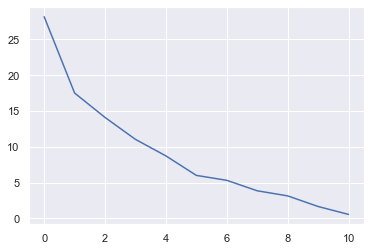

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()


plt.plot(results.explained_variance_ratio_*100) # scree plot
plt.show()

The above is called a __scree plot__. It shows the variances explained by each latent variable. The first component explains approx. 28% of the variance in the whole dataset.

Ideally, we would like to see an __elbow shape__ in order to decide which PCs to keep and which ones to disregard. In practice, this rarely happens. Most of the time, we use enough PCs so that they explain 95% or 99% of the variation in the data.

By examining the above figure, we can conclude that first 6 variables contain most of the information inside the data.

### Interpret the results (what do the first 6 PCs represent?)

Once we apply the PCA, we are no longer in our familiar domain. We are in a different domain in which the latents are the linear combinations of the original variables, but they don't represent any meaningful properties. Thus, it is impossible to interpret them by themselves.

We usually look at the correlation between the latent variable and original variables. If any of the original variables correlate well with the first few PCs, we usually conclude that the PCs are mainly influenced by the said variables, thus they must be the important ones.

The other approach is that we look at the PCA coefficients. These coefficients tell us how much of the original variables are used in creating the PCs. The higher the coefficient, the more important is the related variable.

Let's put the component (PCA coefficients) into a data frame to see more comfortably:

In [17]:
pd.DataFrame(results.components_)

,0,1,2,3,4,5,6,7,8,9,10
0,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
1,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
2,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
3,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
4,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
5,0.101479,0.411449,0.069593,0.049156,0.304339,-0.014000,0.136308,-0.391152,-0.522116,-0.381263,0.361645
6,-0.350227,-0.533735,0.105497,0.290663,0.370413,-0.116596,-0.093662,-0.170481,-0.025138,-0.447469,-0.327651
7,-0.177595,-0.078775,-0.377516,0.299845,-0.357009,-0.204781,0.019036,-0.239223,-0.561391,0.374604,-0.217626
8,-0.194021,0.129110,0.381450,-0.007523,-0.111339,-0.635405,0.592116,-0.020719,0.167746,0.058367,-0.037603
9,-0.249523,0.365925,0.621677,0.092872,-0.217671,0.248483,-0.370750,-0.239990,-0.010970,0.112320,-0.303015


The above is the _coefficient matrix_. The first row is the coefficients that generated the first PC. In other words, the first PC was generated using the following formula:

PC1 = (fixed acidity * 0.489314) + (volatile acidity * -0.238584) + ... + (alcohol * -0.113232) 

If we choose to use the first 6 PCs, what do we call them? This is a bit tricky, because they are wieghted combinations of the original variables. Thus, a wine expert may help us to name them. Let's assume that the expert gave us the following names for the new (latent) variables: 1.Acidity, 2.Sulfides, 3.More alcohol, 4.Chlorides, 5.More residual sugar, 6. Less pH

In [18]:
pd.DataFrame(Z[:,:6], columns=list(
[u'Acidity', u'Sulfides', u'More alcohol', u'Chlorides', u'More residual sugar', u'Less pH'])).head(10)

,Acidity,Sulfides,More alcohol,Chlorides,More residual sugar,Less pH
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921
5,-1.583707,0.569195,-1.538286,0.023750,-0.110076,-0.993626
6,-1.101464,0.608015,-1.075915,-0.343959,-1.133382,0.175000
7,-2.248708,-0.416835,-0.986837,-0.001203,-0.780435,0.286057
8,-1.086887,-0.308569,-1.518150,0.003315,-0.226727,-0.512634
9,0.654790,1.665207,1.209476,-0.824635,1.718501,-0.476497


__Usually, naming the new variables is dangerous unless we confidently conclude that the latent variables represent known properties. This requires expert knowledge.__

### 4b. Model selection - predictive model

We can compare the prediction powers of the original variables and latent variables. Since the target is a categorical variable, we will perform a classification operation. We will use KNN for this purpose.

__1. Using the original data set__

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)
pred = neigh.predict(X)
print('Confusion matrix:')
print(confusion_matrix(pred,y))
print('\nAccuracy:')
print(accuracy_score(pred,y))

Confusion matrix:
[[  6   5   2   0   0   0]
 [  0  18  10  13   0   0]
 [  2  17 589  87  18   2]
 [  2  12  75 511  36   7]
 [  0   1   4  27 144   7]
 [  0   0   1   0   1   2]]

Accuracy:
0.7942464040025016


__2. Using the first 6 PCs__

In [29]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Z[:,:6],y)
pred = neigh.predict(Z[:,:6])
print('Confusion matrix:')
print(confusion_matrix(pred,y))
print('\nAccuracy:')
print(accuracy_score(pred,y))

Confusion matrix:
[[  7   4   5   1   0   0]
 [  0  18  11  11   3   0]
 [  2  16 584  92  26   4]
 [  1  14  75 507  37   6]
 [  0   1   6  27 132   5]
 [  0   0   0   0   1   3]]

Accuracy:
0.7823639774859287


Using 6 variables instead of 11, we achive almost the same accuracy in our prediction.

Note: Here, we used the training set for prediction. Ideally, we would want to use two separate sets for training the model and testing it.

### Resources:

* D. Cielen, A. Meysman, M. Ali, Introducing Data Science: Big Data Machine Learning and more using Python tools, Manning Publications.
* Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
* P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.